In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from pydataset import data
from env import get_db_url
import acquire

# Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.


### open iris from pydataset

In [2]:
df = data('iris')

### print the first 3 rows
### 

In [3]:
df[:3]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


#### OR

In [4]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### print the number of rows and columns (shape)
### 

In [5]:
df.shape

(150, 5)

### print the column names
### 

In [6]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### print the data type of each column
### 

In [7]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

### print the summary statistics for each of the numeric variables
### 

In [8]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Read the data from this google sheet into a dataframe, df_google.
### 

In [9]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### print the first 3 rows
### 

In [10]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns
### 

In [11]:
df_google.shape

(891, 12)

### print the column names
### 

In [12]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### print the data type of each column
### 

In [13]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### print the summary statistics for each of the numeric variables
### 

In [14]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### print the unique values for each of your categorical variables
### 

In [15]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.
### 

In [16]:
df = pd.read_excel('train.xlsx')

### assign the first 100 rows to a new dataframe, df_excel_sample
### 

In [17]:
df_excel_sample = df.head(100)

In [18]:
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


### print the number of rows of your original dataframe
### 

In [19]:
df.shape

(891, 12)

### print the first 5 column names
### 

In [20]:
df.iloc[:, :5].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

### print the column names that have a data type of object
### 

In [21]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
df.select_dtypes(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [23]:
df.select_dtypes(include = 'object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### compute the range for each of the numeric variables.
### 

In [24]:
columns = df.select_dtypes(include='number')

range_of_columns = columns.max() - columns.min()


In [25]:
range_of_columns

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

### Using the Iris Data:

In [26]:
import pandas as pd
from pydataset import data
import seaborn
import matplotlib as plt
from env import get_db_url
import acquire

### Use the function defined in acquire.py to load the iris data.

In [27]:
iris = acquire.new_iris_db()

In [28]:
iris

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


### Drop the species_id and measurement_id columns.

In [29]:

cols_to_drop = ['species_id']
df = iris.drop(columns=cols_to_drop)
df




,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


### Rename the species_name column to just species.

In [30]:
df = df.rename(columns={'species_name': 'species'})


In [31]:
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


### Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [32]:
dummies = pd.get_dummies(df['species'], prefix = 'species')
df = pd.concat([df,dummies], axis=1)

In [33]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
5,setosa,5.4,3.9,1.7,0.4,1,0,0
6,setosa,4.6,3.4,1.4,0.3,1,0,0
7,setosa,5.0,3.4,1.5,0.2,1,0,0
8,setosa,4.4,2.9,1.4,0.2,1,0,0
9,setosa,4.9,3.1,1.5,0.1,1,0,0


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
df = acquire.new_iris_db()

In [35]:
def prep_iris(df):
   
    
    df = df.drop_duplicates()
    df = df.drop(columns=['species_id'])
    dummies = pd.get_dummies(df['species_name'], prefix = 'species')
    df = df.rename(columns={'species_name': 'species'})
    df = pd.concat([df,dummies], axis=1)
    return df


In [36]:
prep_iris(df)

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
5,setosa,5.4,3.9,1.7,0.4,1,0,0
6,setosa,4.6,3.4,1.4,0.3,1,0,0
7,setosa,5.0,3.4,1.5,0.2,1,0,0
8,setosa,4.4,2.9,1.4,0.2,1,0,0
9,setosa,4.9,3.1,1.5,0.1,1,0,0


### Using the Titanic dataset

### Use the function defined in acquire.py to load the Titanic data.

In [37]:
df = acquire.new_titanic_data()

In [38]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### Drop any unnecessary, unhelpful, or duplicated columns.

In [39]:
cols_to_drop = ['class','sibsp','embarked']
df = df.drop(columns=cols_to_drop)
df

,passenger_id,survived,pclass,sex,age,parch,fare,deck,embark_town,alone
0,0,0,3,male,22.0,0,7.2500,None,Southampton,0
1,1,1,1,female,38.0,0,71.2833,C,Cherbourg,0
2,2,1,3,female,26.0,0,7.9250,None,Southampton,1
3,3,1,1,female,35.0,0,53.1000,C,Southampton,0
4,4,0,3,male,35.0,0,8.0500,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,13.0000,None,Southampton,1
887,887,1,1,female,19.0,0,30.0000,B,Southampton,1
888,888,0,3,female,NaN,2,23.4500,None,Southampton,0
889,889,1,1,male,26.0,0,30.0000,C,Cherbourg,1


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [40]:
dummies = pd.get_dummies(df['deck'], prefix = 'deck')
df = pd.concat([df,dummies], axis=1)

In [41]:
df

,passenger_id,survived,pclass,sex,age,parch,fare,deck,embark_town,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,0,3,male,22.0,0,7.2500,None,Southampton,0,0,0,0,0,0,0,0
1,1,1,1,female,38.0,0,71.2833,C,Cherbourg,0,0,0,1,0,0,0,0
2,2,1,3,female,26.0,0,7.9250,None,Southampton,1,0,0,0,0,0,0,0
3,3,1,1,female,35.0,0,53.1000,C,Southampton,0,0,0,1,0,0,0,0
4,4,0,3,male,35.0,0,8.0500,None,Southampton,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,13.0000,None,Southampton,1,0,0,0,0,0,0,0
887,887,1,1,female,19.0,0,30.0000,B,Southampton,1,0,1,0,0,0,0,0
888,888,0,3,female,NaN,2,23.4500,None,Southampton,0,0,0,0,0,0,0,0
889,889,1,1,male,26.0,0,30.0000,C,Cherbourg,1,0,0,1,0,0,0,0


### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [42]:
df = acquire.new_titanic_data()

In [43]:
def prep_titanic(df):
   
    
    df = df.drop_duplicates()
    df = df.drop(columns=['class','sibsp','embarked'])
    dummies = pd.get_dummies(df['deck'], prefix = 'deck')
    df = df.rename(columns={'fare': 'flight_cost'})
    df = pd.concat([df,dummies], axis=1)
    return df

In [44]:
prep_titanic(df)

,passenger_id,survived,pclass,sex,age,parch,flight_cost,deck,embark_town,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,0,3,male,22.0,0,7.2500,None,Southampton,0,0,0,0,0,0,0,0
1,1,1,1,female,38.0,0,71.2833,C,Cherbourg,0,0,0,1,0,0,0,0
2,2,1,3,female,26.0,0,7.9250,None,Southampton,1,0,0,0,0,0,0,0
3,3,1,1,female,35.0,0,53.1000,C,Southampton,0,0,0,1,0,0,0,0
4,4,0,3,male,35.0,0,8.0500,None,Southampton,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,13.0000,None,Southampton,1,0,0,0,0,0,0,0
887,887,1,1,female,19.0,0,30.0000,B,Southampton,1,0,1,0,0,0,0,0
888,888,0,3,female,NaN,2,23.4500,None,Southampton,0,0,0,0,0,0,0,0
889,889,1,1,male,26.0,0,30.0000,C,Cherbourg,1,0,0,1,0,0,0,0


### Using the Telco dataset 

### Use the function defined in acquire.py to load the Telco data. 

In [45]:
df = acquire.new_telco_data()

In [46]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,2,No,2,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,Yes,1,Yes,1,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,1,Yes,2,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,3,No,2,67.85,4627.65,No,Two year,DSL,Mailed check


### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [47]:
df = df.drop(columns=['payment_type_id','contract_type_id','internet_service_type_id'])

In [48]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [49]:
dummies = pd.get_dummies(df['payment_type'], prefix = 'payment')
df = pd.concat([df,dummies], axis=1)

In [50]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,65.60,593.3,No,One year,DSL,Mailed check,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,59.90,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,55.15,742.9,No,One year,DSL,Mailed check,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,67.85,4627.65,No,Two year,DSL,Mailed check,0,0,0,1


### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [51]:
df = acquire.new_telco_data()

In [52]:
def prep_telco(df):
   
    
    df = df.drop_duplicates()
    df = df.drop(columns=['payment_type_id','contract_type_id','internet_service_type_id'])
    dummies = pd.get_dummies(df['payment_type'], prefix = 'payment')
    df = df.rename(columns={'churn': 'active'})
    df = pd.concat([df,dummies], axis=1)
    return df

In [53]:
df = prep_telco(df)

In [54]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,active,contract_type,internet_service_type,payment_type,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,65.60,593.3,No,One year,DSL,Mailed check,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,59.90,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,55.15,742.9,No,One year,DSL,Mailed check,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,67.85,4627.65,No,Two year,DSL,Mailed check,0,0,0,1


###  - Split your data

### Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [55]:
import prepare

### Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [56]:
df = acquire.new_iris_db()

In [57]:
df = prep_iris(df)

In [58]:
train, test, validate = prepare.split_iris_data(df)
train, test, validate

Train:(83, 8)
Test:(30, 8)
Val: (36, 8)
Train Iris Data:
(83, 8)
        species  sepal_length  sepal_width  petal_length  petal_width  \
123   virginica           6.3          2.7           4.9          1.8   
125   virginica           7.2          3.2           6.0          1.8   
112   virginica           6.8          3.0           5.5          2.1   
6        setosa           4.6          3.4           1.4          0.3   
67   versicolor           5.8          2.7           4.1          1.0   
69   versicolor           5.6          2.5           3.9          1.1   
31       setosa           5.4          3.4           1.5          0.4   
144   virginica           6.7          3.3           5.7          2.5   
87   versicolor           6.3          2.3           4.4          1.3   
134   virginica           6.1          2.6           5.6          1.4   
53   versicolor           5.5          2.3           4.0          1.3   
89   versicolor           5.5          2.5           4.0   

(        species  sepal_length  sepal_width  petal_length  petal_width  \
 123   virginica           6.3          2.7           4.9          1.8   
 125   virginica           7.2          3.2           6.0          1.8   
 112   virginica           6.8          3.0           5.5          2.1   
 6        setosa           4.6          3.4           1.4          0.3   
 67   versicolor           5.8          2.7           4.1          1.0   
 69   versicolor           5.6          2.5           3.9          1.1   
 31       setosa           5.4          3.4           1.5          0.4   
 144   virginica           6.7          3.3           5.7          2.5   
 87   versicolor           6.3          2.3           4.4          1.3   
 134   virginica           6.1          2.6           5.6          1.4   
 53   versicolor           5.5          2.3           4.0          1.3   
 89   versicolor           5.5          2.5           4.0          1.3   
 41       setosa           4.5        

### Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [59]:
df = acquire.new_titanic_data()

In [60]:
df = prep_titanic(df)

In [61]:
train, test, validate= prepare.split_titanic_data(df)
train, test, validate

Train:(498, 17)
Test:(179, 17)
Val: (214, 17)
Train Titanic Data:
     passenger_id  survived  pclass     sex   age  parch  flight_cost  deck  \
583           583         0       1    male  36.0      0      40.1250     A   
165           165         1       3    male   9.0      2      20.5250  None   
50             50         0       3    male   7.0      1      39.6875  None   
259           259         1       2  female  50.0      1      26.0000  None   
306           306         1       1  female   NaN      0     110.8833  None   
..            ...       ...     ...     ...   ...    ...          ...   ...   
313           313         0       3    male  28.0      0       7.8958  None   
636           636         0       3    male  32.0      0       7.9250  None   
222           222         0       3    male  51.0      0       8.0500  None   
485           485         0       3  female   NaN      1      25.4667  None   
744           744         1       3    male  31.0      0       7.

(     passenger_id  survived  pclass     sex   age  parch  flight_cost  deck  \
 583           583         0       1    male  36.0      0      40.1250     A   
 165           165         1       3    male   9.0      2      20.5250  None   
 50             50         0       3    male   7.0      1      39.6875  None   
 259           259         1       2  female  50.0      1      26.0000  None   
 306           306         1       1  female   NaN      0     110.8833  None   
 ..            ...       ...     ...     ...   ...    ...          ...   ...   
 313           313         0       3    male  28.0      0       7.8958  None   
 636           636         0       3    male  32.0      0       7.9250  None   
 222           222         0       3    male  51.0      0       8.0500  None   
 485           485         0       3  female   NaN      1      25.4667  None   
 744           744         1       3    male  31.0      0       7.9250  None   
 
      embark_town  alone  deck_A  deck

### Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [73]:
df = acquire.new_telco_data()

In [74]:
df = prep_telco(df)

In [170]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,89.85,6697.35,No,Two year,DSL,Bank transfer (automatic)
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,Yes,Yes,No,No,77.35,5396.25,No,Two year,DSL,Credit card (automatic)
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,...,Yes,Yes,Yes,No,100.25,4753.85,No,One year,Fiber optic,Electronic check
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,...,Yes,No,Yes,Yes,40.05,162.45,No,Month-to-month,DSL,Electronic check
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,...,No,No,No,Yes,54.75,445.85,No,Month-to-month,DSL,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,Male,0,Yes,Yes,72,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,103.40,7372.65,Yes,Two year,Fiber optic,Electronic check
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,No,Yes,...,Yes,Yes,No,Yes,50.50,2566.3,No,Month-to-month,DSL,Electronic check
2128,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,102.60,4213.35,Yes,One year,Fiber optic,Electronic check
3586,5081-NWSUP,Female,0,No,No,10,Yes,No,No,Yes,...,Yes,No,Yes,No,64.90,685.55,No,One year,DSL,Mailed check


In [172]:
train, test, validate = prepare.split_telco_data(df)

Train:(2207, 21)
Test:(789, 21)
Val: (947, 21)
Train Telco Data:
(2207, 21)
     customer_id  gender  senior_citizen partner dependents  tenure  \
5362  7571-YXDAD  Female               0      No         No       2   
4636  6543-CPZMK    Male               0     Yes        Yes       9   
466   0680-DFNNY    Male               0     Yes         No      15   
4170  5896-NPFWW    Male               0     Yes        Yes       3   
1510  2219-MVUSO    Male               0      No         No       8   
...          ...     ...             ...     ...        ...     ...   
4597  6481-ESCNL  Female               0      No         No      29   
4967  6990-YNRIO    Male               0     Yes        Yes      65   
5651  7967-HYCDE    Male               0      No         No       8   
6713  9534-NSXEM    Male               0      No         No      26   
5496  7739-LAXOG  Female               0     Yes        Yes      32   

     phone_service    multiple_lines      online_security  \
5362      

## Attendance Data

### Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [173]:
from sklearn.model_selection import train_test_split
import pandas as pd
from pydataset import data
from env import get_db_url
import acquire

In [76]:
attendance = pd.read_csv('attendance.csv')

In [77]:
attendance = attendance.rename(columns = {attendance.columns[0]:'name'})

In [78]:
attendance

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [79]:
attendance_melt = attendance.melt(id_vars=['name'], 
                         var_name='day', 
                         value_name='infraction')





In [80]:
attendance_melt

,name,day,infraction
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [81]:
point_mapping = {'P': 1, 'A': 0, 'T': .90, 'H': .50}

attendance_melt['points'] = attendance_melt['infraction'].map(point_mapping)

In [82]:
attendance_melt

,name,day,infraction,points
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9
5,Jane,2018-01-02,P,1.0
6,Billy,2018-01-02,T,0.9
7,John,2018-01-02,T,0.9
8,Sally,2018-01-03,T,0.9
9,Jane,2018-01-03,T,0.9


In [83]:
att_perc = attendance_melt.groupby('name').points.mean()
att_perc

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: points, dtype: float64

### You should end up with something like this:
```
 name
 Billy    0.5250
 Jane     0.6875
 John     0.9125
 Sally    0.7625
 Name: grade, dtype: float64
 Coffee Levels
```

### Read the coffee_levels table.
### Transform the data so that each carafe is in it's own column.

In [84]:
coffee = pd.read_csv('coffee_levels.csv')

In [85]:
coffee

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


### Is this the best shape for the data?

In [86]:
tidy_coffee = coffee.pivot(index='hour', columns='coffee_carafe')
tidy_coffee.reset_index()


hour coffee_amount                    
coffee_carafe                  x         y         z
0                8      0.816164  0.189297  0.999264
1                9      0.451018  0.521502  0.915990
2               10      0.843279  0.023163  0.144928
3               11      0.335533  0.235529  0.311495
4               12      0.898291  0.017009  0.771947
5               13      0.310711  0.997464  0.398520
6               14      0.507288  0.058361  0.864464
7               15      0.215043  0.144644  0.436364
8               16      0.183891  0.544676  0.280621
9               17      0.391560  0.594126  0.436677

### Cake Recipes

### Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

### Tidy the data as necessary.

In [87]:
cake = pd.read_csv('cake_recipes.csv')
cake

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [88]:
cake.columns

Index(['recipe:position', '225', '250', '275', '300'], dtype='object')

In [89]:
new_vars = cake['recipe:position'].str.split(pat=':', expand=True)

new_vars.columns = ['recipe', 'position']

In [90]:

cake = pd.concat([cake, new_vars], axis=1)
cake = cake.drop(columns=['recipe:position'])

In [91]:
cake

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [92]:
cake_melt = cake.melt(id_vars=['recipe','position'], 
                         var_name='temp', 
                         value_name='score')

In [93]:
cake_melt

,recipe,position,temp,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207
5,c,top,225,71.306308
6,d,bottom,225,52.799753
7,d,top,225,96.873178
8,a,bottom,250,53.912627
9,a,top,250,52.009735


In [94]:
cake_tidy = cake_melt

In [95]:
cake_tidy

,recipe,position,temp,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207
5,c,top,225,71.306308
6,d,bottom,225,52.799753
7,d,top,225,96.873178
8,a,bottom,250,53.912627
9,a,top,250,52.009735


### Which recipe, on average, is the best?

In [96]:
best_recipe = cake_tidy.groupby('recipe').score.mean()

In [97]:
best_recipe

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: score, dtype: float64

In [98]:
best_recipe.idxmax()

'b'

### Which oven temperature, on average, produces the best results?

In [99]:
best_temp = cake_tidy.groupby('temp').score.mean()

In [100]:
best_temp

temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: score, dtype: float64

In [101]:
best_temp.idxmax()

'275'

### Which combination of recipe, rack position, and temperature gives the best result?

In [102]:
best_position = cake_tidy.groupby('position').score.mean()
best_position

position
bottom    68.408553
top       71.290381
Name: score, dtype: float64

In [103]:
best_position.idxmax()

'top'

In [104]:
print('Recipe:',best_recipe.idxmax())
print('Position:',best_position.idxmax())
print('Temp:',best_temp.idxmax())

Recipe: b
Position: top
Temp: 275


# Part I

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

In [105]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import prepare
from env import get_db_url, host, user, password
from sklearn.model_selection import train_test_split

np.random.seed(123)

In [106]:
df = acquire.new_iris_db()

In [107]:
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


### Acquire, prepare & split your data.

In [108]:
def prep_iris(df):
   
    
    df = df.drop_duplicates()
    df = df.drop(columns=['species_id'])
    dummies = pd.get_dummies(df['species_name'], prefix = 'species')
    df = df.rename(columns={'species_name': 'species'})
    df = pd.concat([df,dummies], axis=1)
    return df

In [109]:
df = prep_iris(df)
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
5,setosa,5.4,3.9,1.7,0.4,1,0,0
6,setosa,4.6,3.4,1.4,0.3,1,0,0
7,setosa,5.0,3.4,1.5,0.2,1,0,0
8,setosa,4.4,2.9,1.4,0.2,1,0,0
9,setosa,4.9,3.1,1.5,0.1,1,0,0


In [110]:
train, test, validate = prepare.split_iris_data(df)
train, test, validate



Train:(83, 8)
Test:(30, 8)
Val: (36, 8)
Train Iris Data:
(83, 8)
        species  sepal_length  sepal_width  petal_length  petal_width  \
123   virginica           6.3          2.7           4.9          1.8   
125   virginica           7.2          3.2           6.0          1.8   
112   virginica           6.8          3.0           5.5          2.1   
6        setosa           4.6          3.4           1.4          0.3   
67   versicolor           5.8          2.7           4.1          1.0   
69   versicolor           5.6          2.5           3.9          1.1   
31       setosa           5.4          3.4           1.5          0.4   
144   virginica           6.7          3.3           5.7          2.5   
87   versicolor           6.3          2.3           4.4          1.3   
134   virginica           6.1          2.6           5.6          1.4   
53   versicolor           5.5          2.3           4.0          1.3   
89   versicolor           5.5          2.5           4.0   

(        species  sepal_length  sepal_width  petal_length  petal_width  \
 123   virginica           6.3          2.7           4.9          1.8   
 125   virginica           7.2          3.2           6.0          1.8   
 112   virginica           6.8          3.0           5.5          2.1   
 6        setosa           4.6          3.4           1.4          0.3   
 67   versicolor           5.8          2.7           4.1          1.0   
 69   versicolor           5.6          2.5           3.9          1.1   
 31       setosa           5.4          3.4           1.5          0.4   
 144   virginica           6.7          3.3           5.7          2.5   
 87   versicolor           6.3          2.3           4.4          1.3   
 134   virginica           6.1          2.6           5.6          1.4   
 53   versicolor           5.5          2.3           4.0          1.3   
 89   versicolor           5.5          2.5           4.0          1.3   
 41       setosa           4.5        

In [111]:
train

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
123,virginica,6.3,2.7,4.9,1.8,0,0,1
125,virginica,7.2,3.2,6.0,1.8,0,0,1
112,virginica,6.8,3.0,5.5,2.1,0,0,1
6,setosa,4.6,3.4,1.4,0.3,1,0,0
67,versicolor,5.8,2.7,4.1,1.0,0,1,0
69,versicolor,5.6,2.5,3.9,1.1,0,1,0
31,setosa,5.4,3.4,1.5,0.4,1,0,0
144,virginica,6.7,3.3,5.7,2.5,0,0,1
87,versicolor,6.3,2.3,4.4,1.3,0,1,0
134,virginica,6.1,2.6,5.6,1.4,0,0,1


## 1. Univariate Stats

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [112]:
df.dtypes

species                object
sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_setosa          uint8
species_versicolor      uint8
species_virginica       uint8
dtype: object

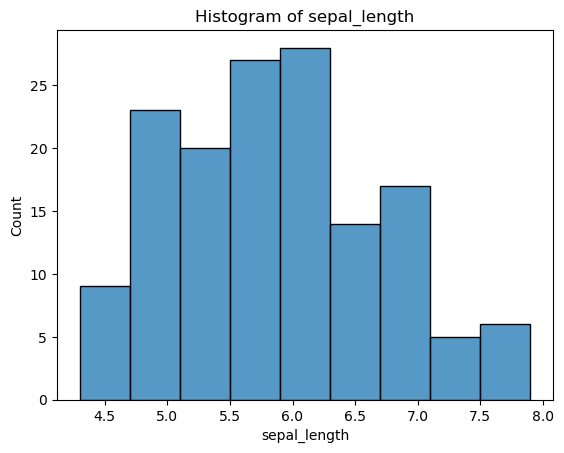

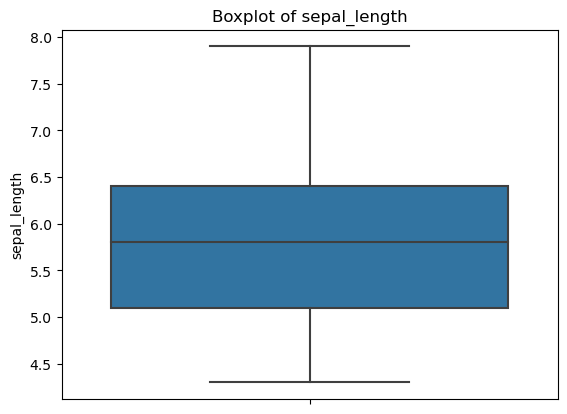

Descriptive Statistics of sepal_length:
count    149.000000
mean       5.843624
std        0.830851
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64



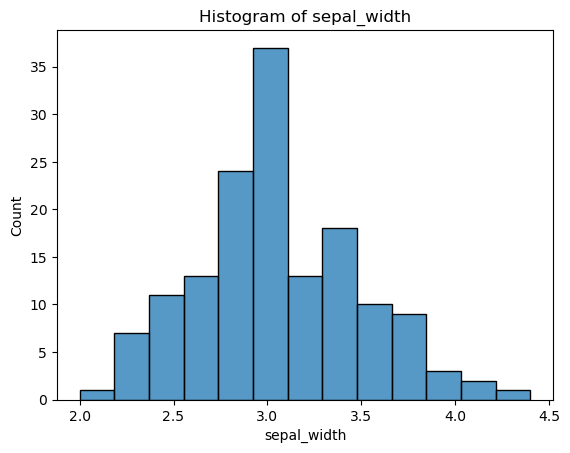

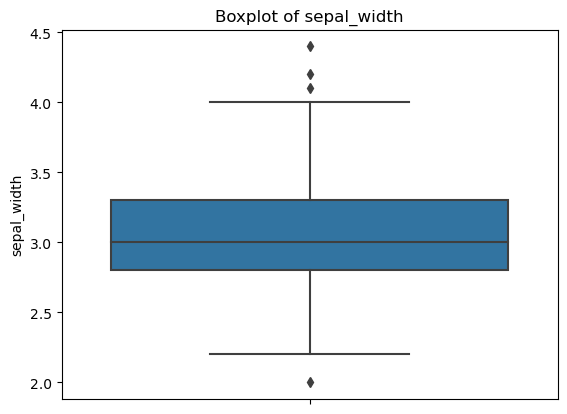

Descriptive Statistics of sepal_width:
count    149.000000
mean       3.059732
std        0.436342
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64



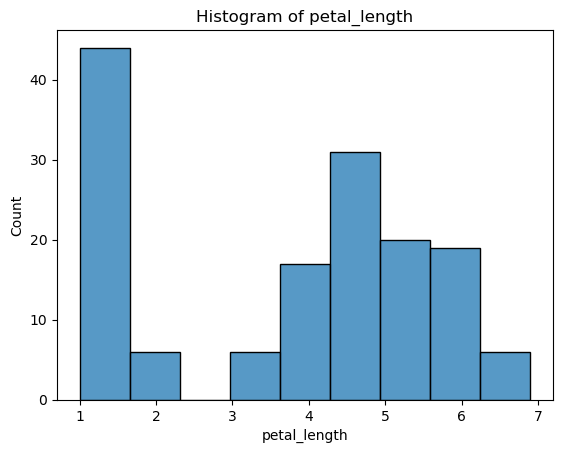

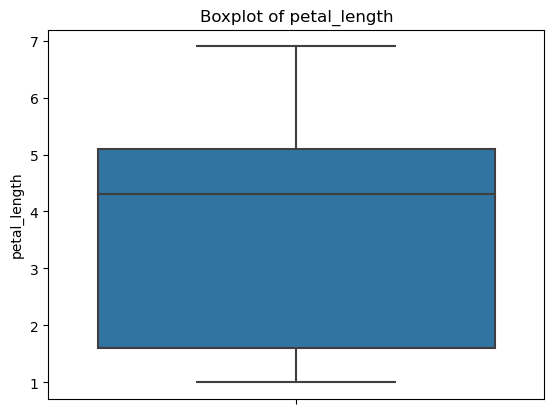

Descriptive Statistics of petal_length:
count    149.000000
mean       3.748993
std        1.767791
min        1.000000
25%        1.600000
50%        4.300000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64



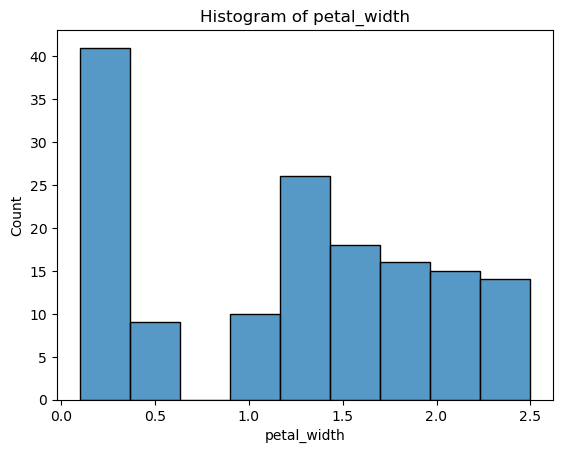

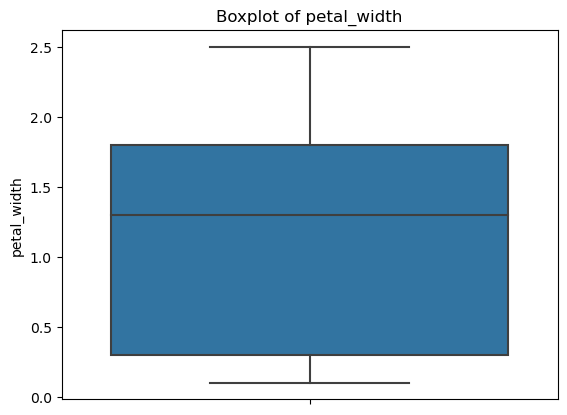

Descriptive Statistics of petal_width:
count    149.000000
mean       1.194631
std        0.762622
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64



In [113]:
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    
    plt.figure()
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.show()

    
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    
    statistics = df[column].describe()
    print(f'Descriptive Statistics of {column}:\n{statistics}\n')

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

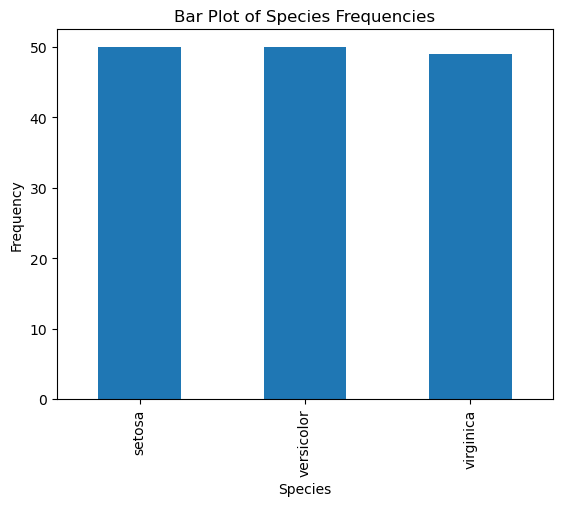

In [114]:
frequency_table = df['species'].value_counts()

plt.figure()
frequency_table.plot(kind='bar')
plt.title("Bar Plot of Species Frequencies")
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.show()

## 2. Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

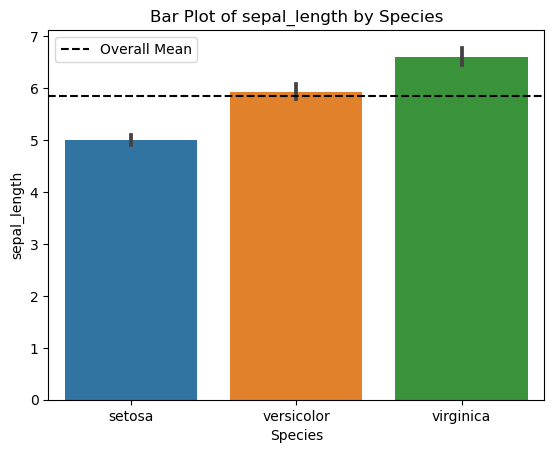

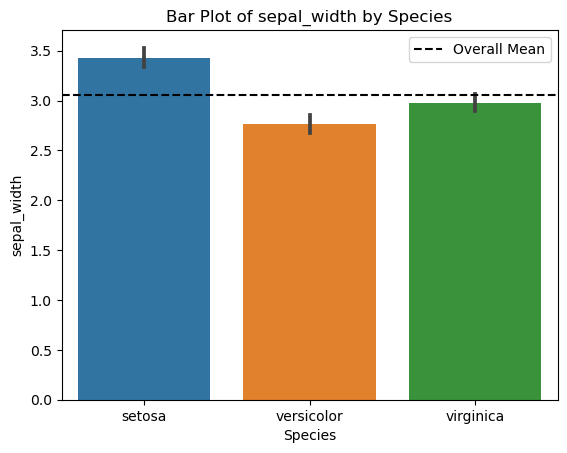

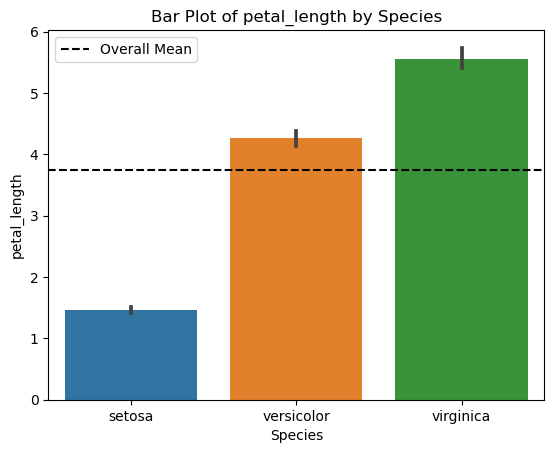

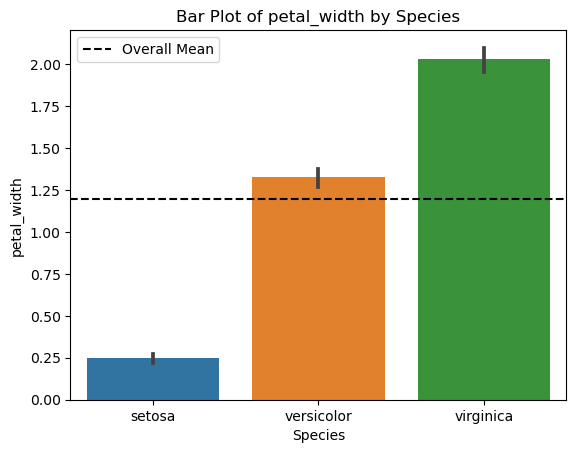

In [115]:
for column in df.columns:
    
    if df[column].dtype in ['int64', 'float64']:
        
        plt.figure()
        sns.barplot(x='species', y=column, data=df)
        plt.title(f'Bar Plot of {column} by Species')
        plt.xlabel('Species')
        plt.ylabel(column)

        overall_mean = df[column].mean()
        plt.axhline(overall_mean, color='black', linestyle='--', label='Overall Mean')
        plt.legend()

        plt.show()

### For each measurement type, compute the descriptive statistics for each species.

In [116]:
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:

    statistics = df[column].describe()
    print(f'Descriptive Statistics of {column}:\n{statistics}\n')

Descriptive Statistics of sepal_length:
count    149.000000
mean       5.843624
std        0.830851
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

Descriptive Statistics of sepal_width:
count    149.000000
mean       3.059732
std        0.436342
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

Descriptive Statistics of petal_length:
count    149.000000
mean       3.748993
std        1.767791
min        1.000000
25%        1.600000
50%        4.300000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

Descriptive Statistics of petal_width:
count    149.000000
mean       1.194631
std        0.762622
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64



### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [117]:
from scipy.stats import mannwhitneyu

virginica_data = df[df['species'] == 'virginica']['petal_width']
versicolor_data = df[df['species'] == 'versicolor']['petal_width']

statistic, p = mannwhitneyu(virginica_data, versicolor_data)

In [118]:
p

1.4601181918034048e-16

In [119]:
virginica_data = df[df['species'] == 'virginica']['petal_length']
versicolor_data = df[df['species'] == 'versicolor']['petal_length']

statistic, p = mannwhitneyu(virginica_data, versicolor_data)

In [120]:
p

1.3422773385385532e-16

In [121]:
virginica_data = df[df['species'] == 'virginica']['sepal_length']
versicolor_data = df[df['species'] == 'versicolor']['sepal_length']

In [122]:
p

1.3422773385385532e-16

In [123]:
virginica_data = df[df['species'] == 'virginica']['sepal_width']
versicolor_data = df[df['species'] == 'versicolor']['sepal_width']

In [124]:
p

1.3422773385385532e-16

### Document takeaways & any actions.

When comparing sepal length and width as well as petal length, they all hold the same p-value. On the other hand, petal width holds a seperate p-value.

## 3. Multivariate Stats

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

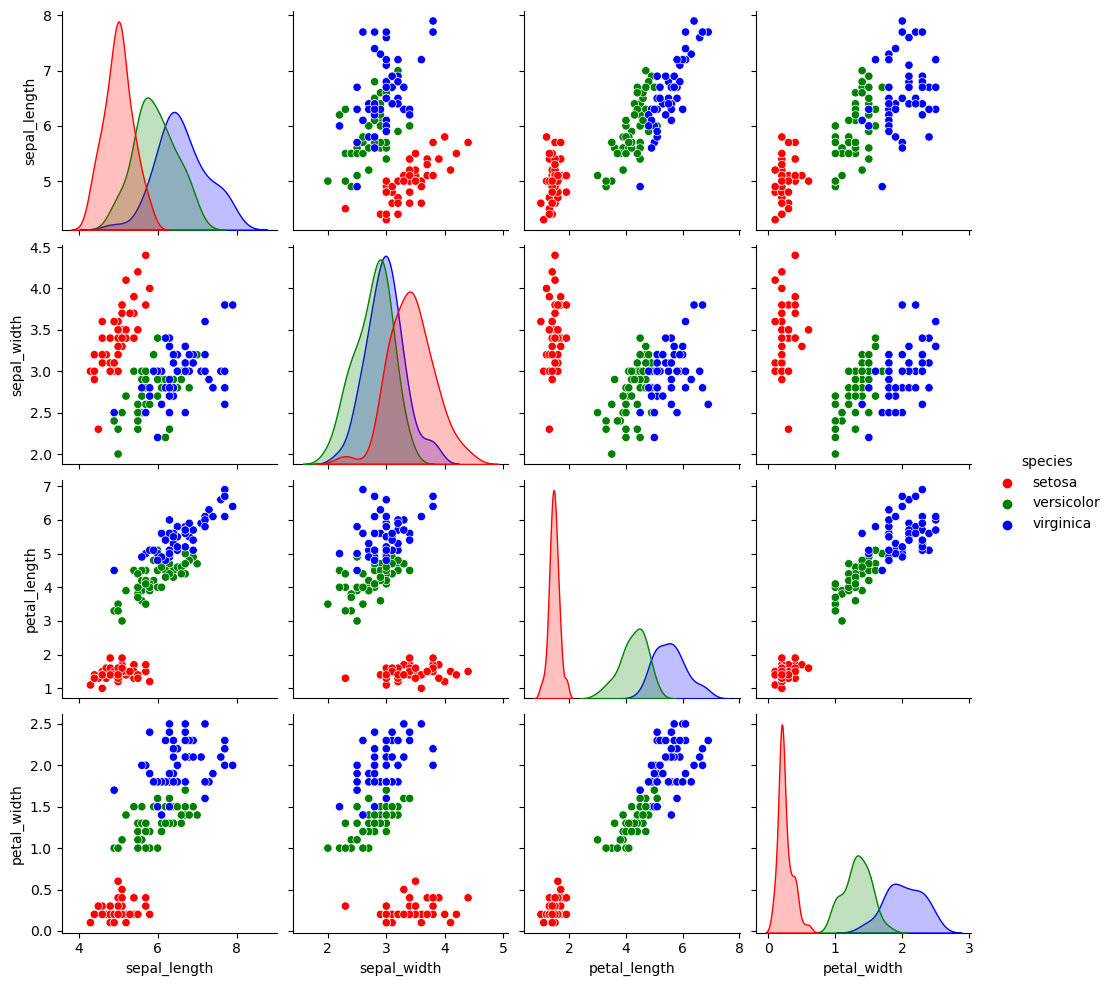

In [125]:
df['color'] = df['species'].map({'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'})

measurements = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.pairplot(data=df, vars=measurements, hue='species', palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'})
plt.show()



### Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

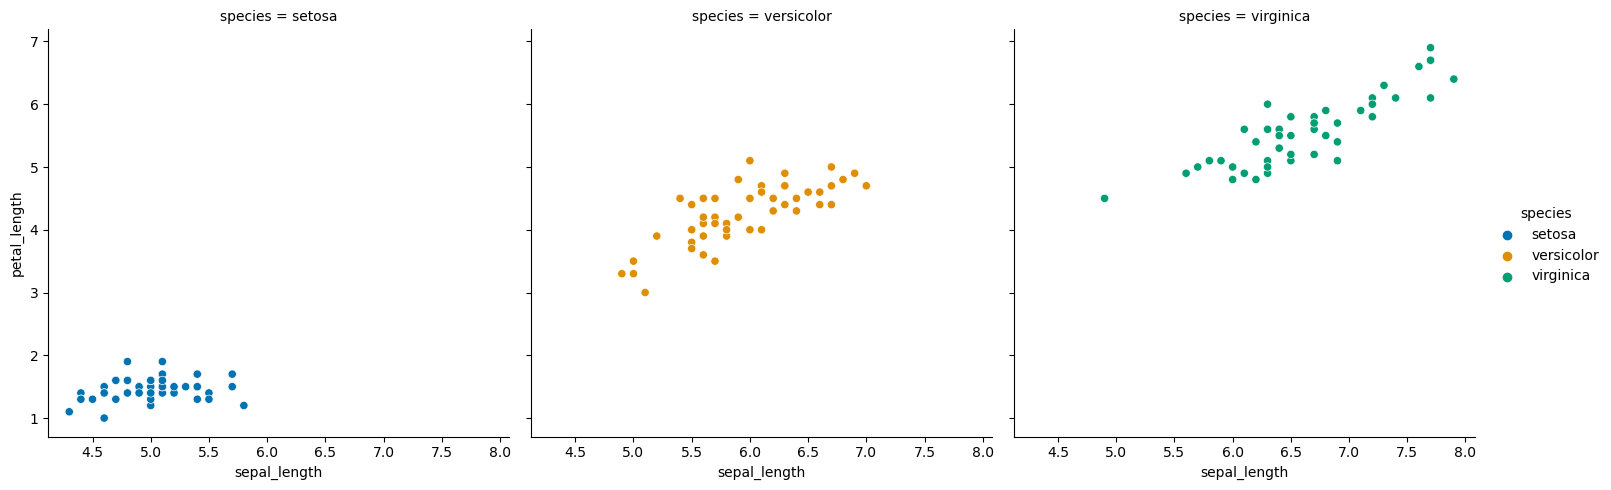

In [126]:
sns.relplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='colorblind', col = 'species')
plt.show()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [127]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica,color
0,setosa,5.1,3.5,1.4,0.2,1,0,0,red
1,setosa,4.9,3.0,1.4,0.2,1,0,0,red
2,setosa,4.7,3.2,1.3,0.2,1,0,0,red
3,setosa,4.6,3.1,1.5,0.2,1,0,0,red
4,setosa,5.0,3.6,1.4,0.2,1,0,0,red
5,setosa,5.4,3.9,1.7,0.4,1,0,0,red
6,setosa,4.6,3.4,1.4,0.3,1,0,0,red
7,setosa,5.0,3.4,1.5,0.2,1,0,0,red
8,setosa,4.4,2.9,1.4,0.2,1,0,0,red
9,setosa,4.9,3.1,1.5,0.1,1,0,0,red


In [128]:
df = df.drop(columns=['color'])

melted_iris = df.melt(id_vars='species', var_name='variable', value_name='measure')



In [129]:
melted_iris

,species,variable,measure
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
1038,virginica,species_virginica,1.0
1039,virginica,species_virginica,1.0
1040,virginica,species_virginica,1.0
1041,virginica,species_virginica,1.0


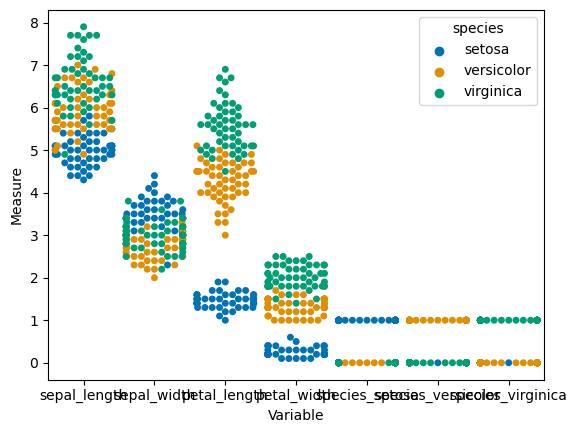

In [130]:
sns.swarmplot(data=melted_iris, x='variable', y='measure', hue='species', palette='colorblind')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.show()

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [131]:
df['sepal_area'] = df.sepal_length * df.sepal_width
df['petal_area'] = df['petal_length'] * df['petal_width']

In [132]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
0,setosa,5.1,3.5,1.4,0.2,1,0,0,17.85,0.28
1,setosa,4.9,3.0,1.4,0.2,1,0,0,14.70,0.28
2,setosa,4.7,3.2,1.3,0.2,1,0,0,15.04,0.26
3,setosa,4.6,3.1,1.5,0.2,1,0,0,14.26,0.30
4,setosa,5.0,3.6,1.4,0.2,1,0,0,18.00,0.28
5,setosa,5.4,3.9,1.7,0.4,1,0,0,21.06,0.68
6,setosa,4.6,3.4,1.4,0.3,1,0,0,15.64,0.42
7,setosa,5.0,3.4,1.5,0.2,1,0,0,17.00,0.30
8,setosa,4.4,2.9,1.4,0.2,1,0,0,12.76,0.28
9,setosa,4.9,3.1,1.5,0.1,1,0,0,15.19,0.15


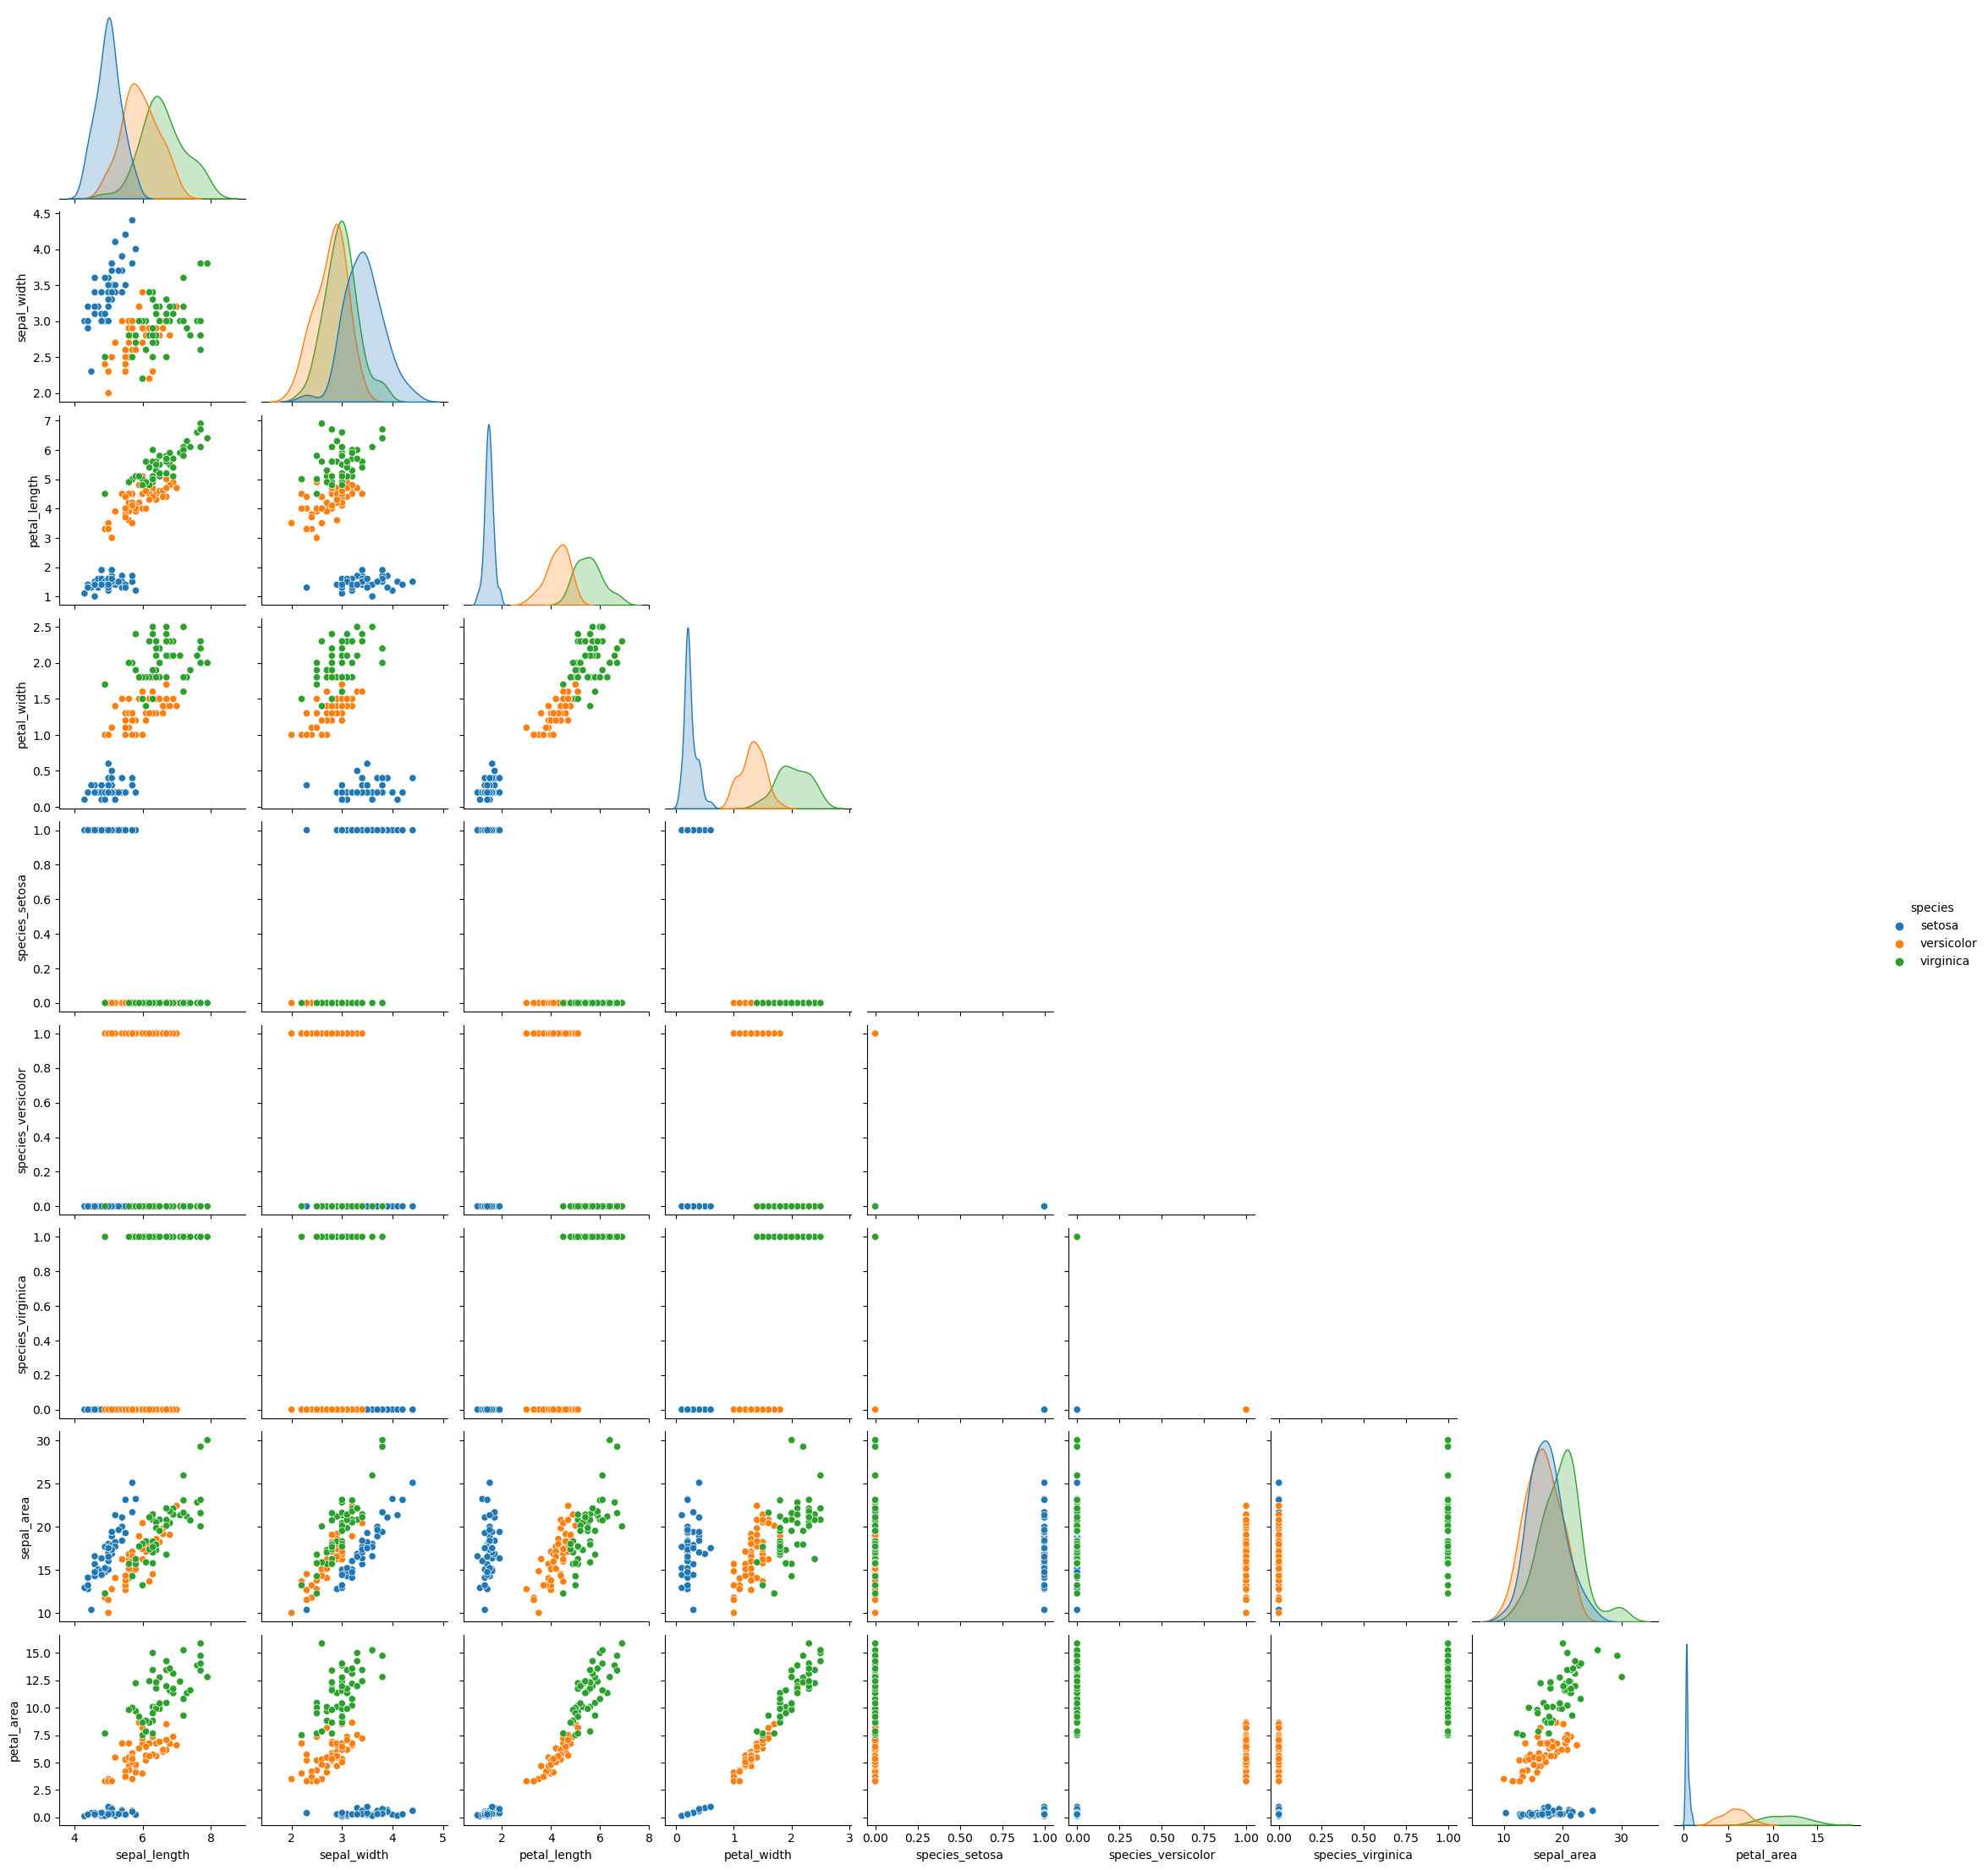

In [133]:
sns.pairplot(df, hue='species', corner=True)
plt.show()

In [134]:
virginica = df[df['species'] == 'virginica']
versicolor = df[df['species'] == 'versicolor']

### Document takeaways and any actions.

H0: Sepal length is the same in virginica and versicolor
Ha: Sepal length significantly different in virginica and versicolor. 

In [135]:
alpha = 0.05

tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )


In [142]:
tstat, p

(5.753540458719486, 1.122667069794545e-07)

In [143]:
p < alpha

True


We can reject the null hypothesis

# Part II
# Explore your titanic dataset more completely.

In [144]:
df = acquire.new_titanic_data()

In [145]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [146]:
def prep_titanic(df):
   
    
    df = df.drop_duplicates()
    df = df.drop(columns=['class','sibsp','embarked'])
    dummies = pd.get_dummies(df['deck'], prefix = 'deck')
    df = df.rename(columns={'fare': 'flight_cost'})
    df = pd.concat([df,dummies], axis=1)
    return df

In [147]:
train, test, validate = prepare.split_titanic_data(df)
train, test, validate

Train:(498, 13)
Test:(179, 13)
Val: (214, 13)
Train Titanic Data:
     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
583           583         0       1    male  36.0      0      0   40.1250   
165           165         1       3    male   9.0      0      2   20.5250   
50             50         0       3    male   7.0      4      1   39.6875   
259           259         1       2  female  50.0      0      1   26.0000   
306           306         1       1  female   NaN      0      0  110.8833   
..            ...       ...     ...     ...   ...    ...    ...       ...   
313           313         0       3    male  28.0      0      0    7.8958   
636           636         0       3    male  32.0      0      0    7.9250   
222           222         0       3    male  51.0      0      0    8.0500   
485           485         0       3  female   NaN      3      1   25.4667   
744           744         1       3    male  31.0      0      0    7.9250   

    embar

(     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
 583           583         0       1    male  36.0      0      0   40.1250   
 165           165         1       3    male   9.0      0      2   20.5250   
 50             50         0       3    male   7.0      4      1   39.6875   
 259           259         1       2  female  50.0      0      1   26.0000   
 306           306         1       1  female   NaN      0      0  110.8833   
 ..            ...       ...     ...     ...   ...    ...    ...       ...   
 313           313         0       3    male  28.0      0      0    7.8958   
 636           636         0       3    male  32.0      0      0    7.9250   
 222           222         0       3    male  51.0      0      0    8.0500   
 485           485         0       3  female   NaN      3      1   25.4667   
 744           744         1       3    male  31.0      0      0    7.9250   
 
     embarked   class  deck  embark_town  alone  
 583        

In [148]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
583,583,0,1,male,36.0,0,0,40.1250,C,First,A,Cherbourg,1
165,165,1,3,male,9.0,0,2,20.5250,S,Third,None,Southampton,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,None,Southampton,0
259,259,1,2,female,50.0,0,1,26.0000,S,Second,None,Southampton,0
306,306,1,1,female,NaN,0,0,110.8833,C,First,None,Cherbourg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,Third,None,Southampton,1
636,636,0,3,male,32.0,0,0,7.9250,S,Third,None,Southampton,1
222,222,0,3,male,51.0,0,0,8.0500,S,Third,None,Southampton,1
485,485,0,3,female,NaN,3,1,25.4667,S,Third,None,Southampton,0


### Determine drivers of the target variable

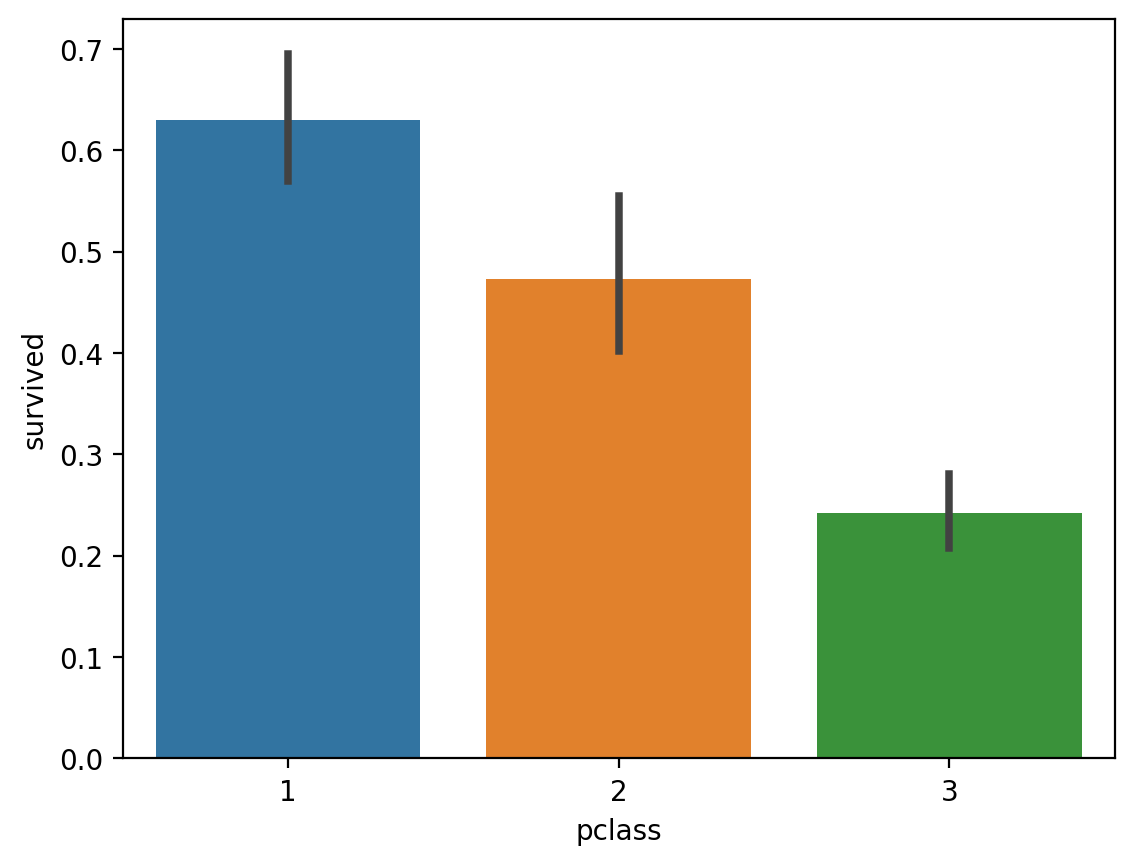

In [149]:
%config InlineBackend.figure_format='retina'
sns.barplot(data= df, x='pclass', y='survived')
plt.show()

In [150]:
train, test, validate = prepare.split_titanic_data(df)
train, test, validate

Train:(498, 13)
Test:(179, 13)
Val: (214, 13)
Train Titanic Data:
     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
583           583         0       1    male  36.0      0      0   40.1250   
165           165         1       3    male   9.0      0      2   20.5250   
50             50         0       3    male   7.0      4      1   39.6875   
259           259         1       2  female  50.0      0      1   26.0000   
306           306         1       1  female   NaN      0      0  110.8833   
..            ...       ...     ...     ...   ...    ...    ...       ...   
313           313         0       3    male  28.0      0      0    7.8958   
636           636         0       3    male  32.0      0      0    7.9250   
222           222         0       3    male  51.0      0      0    8.0500   
485           485         0       3  female   NaN      3      1   25.4667   
744           744         1       3    male  31.0      0      0    7.9250   

    embar

(     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
 583           583         0       1    male  36.0      0      0   40.1250   
 165           165         1       3    male   9.0      0      2   20.5250   
 50             50         0       3    male   7.0      4      1   39.6875   
 259           259         1       2  female  50.0      0      1   26.0000   
 306           306         1       1  female   NaN      0      0  110.8833   
 ..            ...       ...     ...     ...   ...    ...    ...       ...   
 313           313         0       3    male  28.0      0      0    7.8958   
 636           636         0       3    male  32.0      0      0    7.9250   
 222           222         0       3    male  51.0      0      0    8.0500   
 485           485         0       3  female   NaN      3      1   25.4667   
 744           744         1       3    male  31.0      0      0    7.9250   
 
     embarked   class  deck  embark_town  alone  
 583        

In [151]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
583,583,0,1,male,36.0,0,0,40.1250,C,First,A,Cherbourg,1
165,165,1,3,male,9.0,0,2,20.5250,S,Third,None,Southampton,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,None,Southampton,0
259,259,1,2,female,50.0,0,1,26.0000,S,Second,None,Southampton,0
306,306,1,1,female,NaN,0,0,110.8833,C,First,None,Cherbourg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,Third,None,Southampton,1
636,636,0,3,male,32.0,0,0,7.9250,S,Third,None,Southampton,1
222,222,0,3,male,51.0,0,0,8.0500,S,Third,None,Southampton,1
485,485,0,3,female,NaN,3,1,25.4667,S,Third,None,Southampton,0


In [152]:
df = train

### Determine if certain columns should be dropped

In [153]:
df = df.drop(columns=['embark_town', 'class']) 



In [154]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
583,583,0,1,male,36.0,0,0,40.1250,C,A,1
165,165,1,3,male,9.0,0,2,20.5250,S,None,0
50,50,0,3,male,7.0,4,1,39.6875,S,None,0
259,259,1,2,female,50.0,0,1,26.0000,S,None,0
306,306,1,1,female,NaN,0,0,110.8833,C,None,1
...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,None,1
636,636,0,3,male,32.0,0,0,7.9250,S,None,1
222,222,0,3,male,51.0,0,0,8.0500,S,None,1
485,485,0,3,female,NaN,3,1,25.4667,S,None,0


### Determine if it would be valuable to bin some numeric columns

In [155]:
age_bins = [0, 18, 30, 40, 50, 60, np.inf]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']


df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)



In [156]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone,age_group
583,583,0,1,male,36.0,0,0,40.1250,C,A,1,31-40
165,165,1,3,male,9.0,0,2,20.5250,S,None,0,0-18
50,50,0,3,male,7.0,4,1,39.6875,S,None,0,0-18
259,259,1,2,female,50.0,0,1,26.0000,S,None,0,41-50
306,306,1,1,female,NaN,0,0,110.8833,C,None,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,None,1,19-30
636,636,0,3,male,32.0,0,0,7.9250,S,None,1,31-40
222,222,0,3,male,51.0,0,0,8.0500,S,None,1,51-60
485,485,0,3,female,NaN,3,1,25.4667,S,None,0,NaN


In [157]:
df = df.drop(columns = ['deck'])

In [158]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,age_group
583,583,0,1,male,36.0,0,0,40.1250,C,1,31-40
165,165,1,3,male,9.0,0,2,20.5250,S,0,0-18
50,50,0,3,male,7.0,4,1,39.6875,S,0,0-18
259,259,1,2,female,50.0,0,1,26.0000,S,0,41-50
306,306,1,1,female,NaN,0,0,110.8833,C,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,1,19-30
636,636,0,3,male,32.0,0,0,7.9250,S,1,31-40
222,222,0,3,male,51.0,0,0,8.0500,S,1,51-60
485,485,0,3,female,NaN,3,1,25.4667,S,0,NaN


### Determine if it would be valuable to combine multiple columns into one.

n/a

### Does it make sense to combine any features?

n/a

### Do you find any surprises?

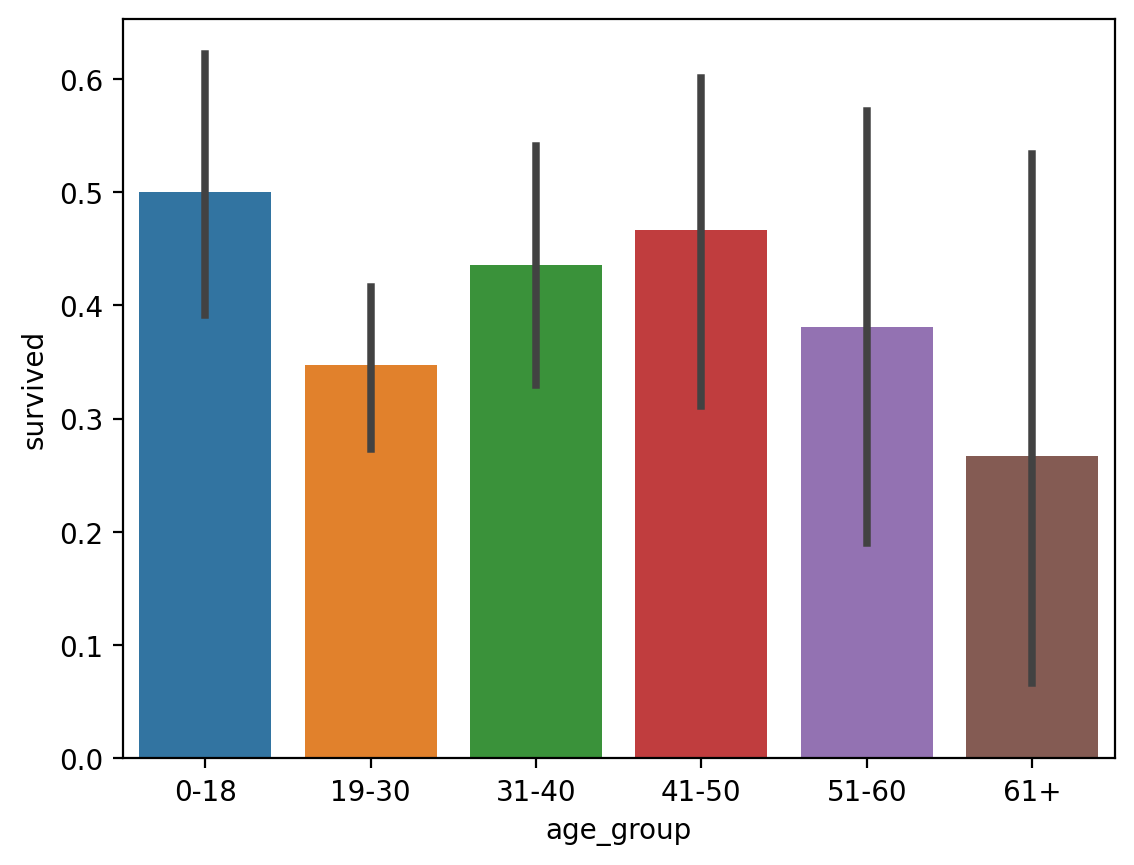

In [159]:
sns.barplot(data= df, x='age_group', y='survived')
plt.show()

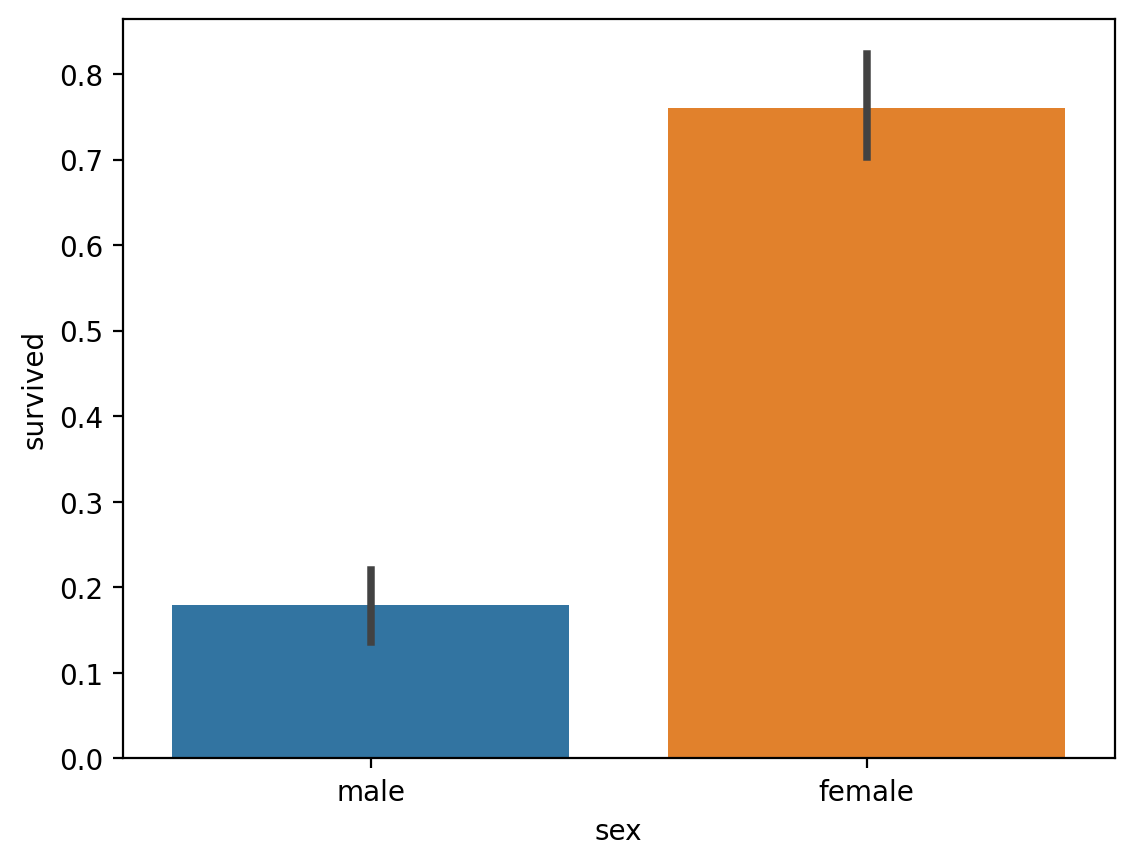

In [160]:
sns.barplot(data= df, x='sex', y='survived')
plt.show()

### Document any and all findings and takeaways in your notebook using markdown.

Ages 0-18 seemed to survive more than any other age.

# Part III
# Explore your telco data to discover drivers of churn
### 

In [161]:
df = acquire.new_telco_data()

In [162]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,2,No,2,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,Yes,1,Yes,1,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,1,Yes,2,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,3,No,2,67.85,4627.65,No,Two year,DSL,Mailed check


In [163]:
train, test, validate = prepare.split_telco_data(df)
train, test, validate

Train:(3943, 24)
Test:(1409, 24)
Val: (1691, 24)
Train Telco Data:
(3943, 24)
     customer_id  gender  senior_citizen partner dependents  tenure  \
5310  7503-MIOGA  Female               1     Yes         No      72   
3790  5329-KRDTM    Male               1     Yes         No      72   
4398  6199-IWKGC  Female               1     Yes         No      46   
2635  3748-FVMZZ    Male               0      No         No       4   
2986  4280-DLSHD    Male               0     Yes         No       8   
...          ...     ...             ...     ...        ...     ...   
6230  8809-RIHDD    Male               0     Yes        Yes      72   
356   0523-VNGTF  Female               1      No         No      52   
2128  3058-HJCUY    Male               0     Yes        Yes      41   
3586  5081-NWSUP  Female               0      No         No      10   
6817  9681-KYGYB    Male               1     Yes         No      49   

     phone_service    multiple_lines  internet_service_type_id  \
531

(     customer_id  gender  senior_citizen partner dependents  tenure  \
 5310  7503-MIOGA  Female               1     Yes         No      72   
 3790  5329-KRDTM    Male               1     Yes         No      72   
 4398  6199-IWKGC  Female               1     Yes         No      46   
 2635  3748-FVMZZ    Male               0      No         No       4   
 2986  4280-DLSHD    Male               0     Yes         No       8   
 ...          ...     ...             ...     ...        ...     ...   
 6230  8809-RIHDD    Male               0     Yes        Yes      72   
 356   0523-VNGTF  Female               1      No         No      52   
 2128  3058-HJCUY    Male               0     Yes        Yes      41   
 3586  5081-NWSUP  Female               0      No         No      10   
 6817  9681-KYGYB    Male               1     Yes         No      49   
 
      phone_service    multiple_lines  internet_service_type_id  \
 5310           Yes               Yes                         1   


In [164]:
df = train

In [165]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,1,Yes,...,Yes,3,Yes,3,89.85,6697.35,No,Two year,DSL,Bank transfer (automatic)
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,1,No,...,No,3,No,4,77.35,5396.25,No,Two year,DSL,Credit card (automatic)
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,2,No,...,Yes,2,No,1,100.25,4753.85,No,One year,Fiber optic,Electronic check
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,1,No,...,Yes,1,Yes,1,40.05,162.45,No,Month-to-month,DSL,Electronic check
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,1,No,...,No,1,Yes,2,54.75,445.85,No,Month-to-month,DSL,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,Male,0,Yes,Yes,72,Yes,Yes,2,No,...,Yes,3,Yes,1,103.40,7372.65,Yes,Two year,Fiber optic,Electronic check
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,1,No,...,No,1,Yes,1,50.50,2566.3,No,Month-to-month,DSL,Electronic check
2128,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,2,No,...,Yes,2,Yes,1,102.60,4213.35,Yes,One year,Fiber optic,Electronic check
3586,5081-NWSUP,Female,0,No,No,10,Yes,No,1,No,...,Yes,2,No,2,64.90,685.55,No,One year,DSL,Mailed check


### Determine if certain columns should be dropped


In [166]:
df = df.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id']) 
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,89.85,6697.35,No,Two year,DSL,Bank transfer (automatic)
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,...,Yes,Yes,No,No,77.35,5396.25,No,Two year,DSL,Credit card (automatic)
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,...,Yes,Yes,Yes,No,100.25,4753.85,No,One year,Fiber optic,Electronic check
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,...,Yes,No,Yes,Yes,40.05,162.45,No,Month-to-month,DSL,Electronic check
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,...,No,No,No,Yes,54.75,445.85,No,Month-to-month,DSL,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,8809-RIHDD,Male,0,Yes,Yes,72,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,103.40,7372.65,Yes,Two year,Fiber optic,Electronic check
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,No,Yes,...,Yes,Yes,No,Yes,50.50,2566.3,No,Month-to-month,DSL,Electronic check
2128,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,102.60,4213.35,Yes,One year,Fiber optic,Electronic check
3586,5081-NWSUP,Female,0,No,No,10,Yes,No,No,Yes,...,Yes,No,Yes,No,64.90,685.55,No,One year,DSL,Mailed check


### Determine if it would be valuable to bin some numeric columns

n/a

### Determine if it would be valuable to combine multiple columns into one.


n/a

### What are your drivers of churn?


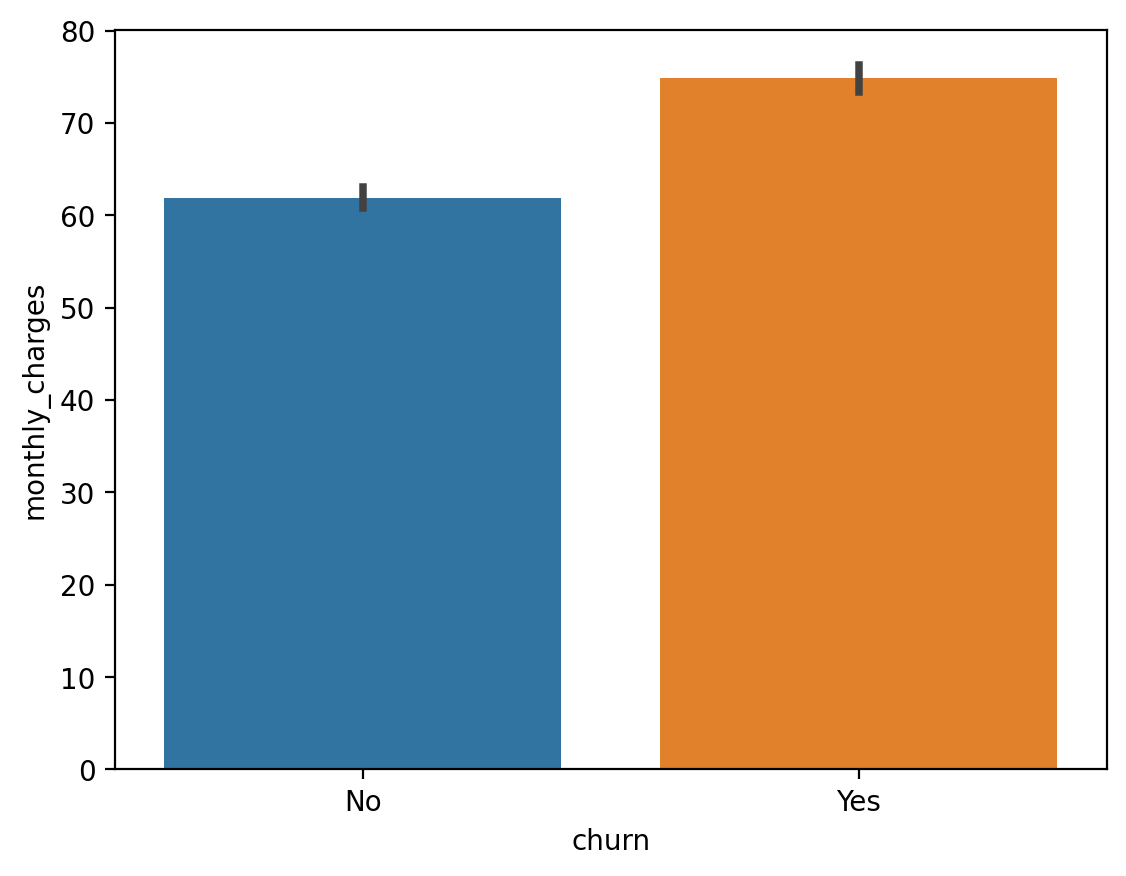

In [167]:
sns.barplot(data= df, x='churn', y='monthly_charges')
plt.show()

### Does it make sense to combine any features?

No

### Do you find any surprises?

visually, seems higher the monthy charge the higher the churn